Name: Arkajyoti Chakraborty

 Transformer Approach using Indic Bert 

Accuracy Achieved: 84% 

 

In [ ]:
import pandas as pd

In [ ]:
!pip install indic-nlp-library
!pip install transformers
!pip install sentencepiece

     |████████████████████████████████| 40 kB 3.0 MB/s 
     |████████████████████████████████| 2.8 MB 7.6 MB/s 
     |████████████████████████████████| 3.4 MB 4.1 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
     |████████████████████████████████| 596 kB 51.1 MB/s 
     |████████████████████████████████| 895 kB 53.9 MB/s 
     |████████████████████████████████| 3.3 MB 35.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 1.2 MB 4.2 MB/s 


In [ ]:
import numpy as np
!pip3 install pandas_ods_reader
from pandas_ods_reader import read_ods

     |████████████████████████████████| 6.4 MB 4.3 MB/s 
     |████████████████████████████████| 125 kB 41.4 MB/s 
  Created wheel for ezodf: filename=ezodf-0.3.2-py2.py3-none-any.whl size=49003 sha256=be06c2e0bb301846f6cffeb43f0bf502a1e5d732ea121bef9b070c110020f666
  Stored in directory: /root/.cache/pip/wheels/8f/60/52/bffa36b97e0136aa62d54948d56e8770b96a5da7f9c65fdd85
Successfully built ezodf
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
df = read_ods("/content/drive/MyDrive/Hindi-Sentiment-Analysis/hi_3500.ods",1, headers=False)
df

,column.0,column.1
0,लोग वतन तक खा जाते हैं इसका इसे यकीन नहींमान ज...,negative
1,गुमनाम है वतन पर मिटने वाले लोग आतन्कवादियों स...,negative
2,ज़ंजीर बदली जा रही थी मैं समझा था रिहाई हो गयी है,negative
3,यूपी में बड़े स्तर पर दंगे करवा सकती है बीजेपी...,negative
4,अंग्रेजी नहीं आती है इसलिए हिन्दी ट्विट ज्यादा...,negative
...,...,...
9072,RT @aajtak: #Mojo बजरंग बली का सबसे विशालकाय र...,neutral
9073,RT @aajtak: कहां अचानक स्कूल में पड़ा मंत्री क...,neutral
9074,RT @aajtak: #MoJo सुनिए कुलभूषण की दर्दभरी आपब...,neutral
9075,RT @aajtak: लव जेहाद के नाम पर क्या उत्तर प्रद...,neutral


In [ ]:
df.columns = ['text', 'label']

In [ ]:
df

,text,label
0,लोग वतन तक खा जाते हैं इसका इसे यकीन नहींमान ज...,negative
1,गुमनाम है वतन पर मिटने वाले लोग आतन्कवादियों स...,negative
2,ज़ंजीर बदली जा रही थी मैं समझा था रिहाई हो गयी है,negative
3,यूपी में बड़े स्तर पर दंगे करवा सकती है बीजेपी...,negative
4,अंग्रेजी नहीं आती है इसलिए हिन्दी ट्विट ज्यादा...,negative
...,...,...
9072,RT @aajtak: #Mojo बजरंग बली का सबसे विशालकाय र...,neutral
9073,RT @aajtak: कहां अचानक स्कूल में पड़ा मंत्री क...,neutral
9074,RT @aajtak: #MoJo सुनिए कुलभूषण की दर्दभरी आपब...,neutral
9075,RT @aajtak: लव जेहाद के नाम पर क्या उत्तर प्रद...,neutral


In [ ]:
df['label'].unique()

array(['negative', 'positive', 'neutral'], dtype=object)

In [ ]:
def ratio(x):
  if x=='positive':
    return 1
  elif x=='neutral':
    return 0
  else:
    return 2    

In [ ]:
df['domain'] = df['label'].apply(ratio)
df

,text,label,domain
0,लोग वतन तक खा जाते हैं इसका इसे यकीन नहींमान ज...,negative,2
1,गुमनाम है वतन पर मिटने वाले लोग आतन्कवादियों स...,negative,2
2,ज़ंजीर बदली जा रही थी मैं समझा था रिहाई हो गयी है,negative,2
3,यूपी में बड़े स्तर पर दंगे करवा सकती है बीजेपी...,negative,2
4,अंग्रेजी नहीं आती है इसलिए हिन्दी ट्विट ज्यादा...,negative,2
...,...,...,...
9072,RT @aajtak: #Mojo बजरंग बली का सबसे विशालकाय र...,neutral,0
9073,RT @aajtak: कहां अचानक स्कूल में पड़ा मंत्री क...,neutral,0
9074,RT @aajtak: #MoJo सुनिए कुलभूषण की दर्दभरी आपब...,neutral,0
9075,RT @aajtak: लव जेहाद के नाम पर क्या उत्तर प्रद...,neutral,0


In [ ]:
DATASET_LEN = 9077

some data cleaning coming up

In [ ]:
from bs4 import BeautifulSoup
import re


def clean_data(text):
    #fixes html tags displayed in encoded format
    text = BeautifulSoup(text, features = "lxml").string

    #remove html markup
    text = re.sub("(<.*?>)", "", text)

    #remove urls
    text = re.sub(r'http\S+', '', text)

    return text

df['text'] = df['text'].apply(clean_data)
df = df.dropna()
display(df)

,text,label,domain
0,लोग वतन तक खा जाते हैं इसका इसे यकीन नहींमान ज...,negative,2
1,गुमनाम है वतन पर मिटने वाले लोग आतन्कवादियों स...,negative,2
2,ज़ंजीर बदली जा रही थी मैं समझा था रिहाई हो गयी है,negative,2
3,यूपी में बड़े स्तर पर दंगे करवा सकती है बीजेपी...,negative,2
4,अंग्रेजी नहीं आती है इसलिए हिन्दी ट्विट ज्यादा...,negative,2
...,...,...,...
9072,RT @aajtak: #Mojo बजरंग बली का सबसे विशालकाय र...,neutral,0
9073,RT @aajtak: कहां अचानक स्कूल में पड़ा मंत्री क...,neutral,0
9074,RT @aajtak: #MoJo सुनिए कुलभूषण की दर्दभरी आपब...,neutral,0
9075,RT @aajtak: लव जेहाद के नाम पर क्या उत्तर प्रद...,neutral,0


In [ ]:
from sklearn.model_selection import train_test_split
df = df.head(DATASET_LEN)
train_df, test_df = train_test_split(df, test_size=0.1)
train_df

train_df.to_csv("train.csv")
test_df.to_csv("test.csv")

In [ ]:
X_train = list(train_df["text"])
X_test = list(test_df["text"])
y_train = list(train_df["domain"])
y_test = list(test_df["domain"])

In [ ]:
X_train

['तीसरी जंग पब्लिशर्स भारत सरकार से रजिस्टर्ड है जो पिछले साल से इस फील्ड में काम अंजाम दे रहा है अगर आप में से',
 'तोता रॉय चौधरी नवीन के किरदार को ज़िंदा कर देते हैं',
 'आस्ट्रेलियाई टीम जहां खिताबी हैट्रिक के लिए प्रयास करेगी वहीं इंग्लिश टीम दोबारा इस खिताब पर कब्जा जमाना चाहेगी.',
 'संयमित कर्म करके मनुष्य अपना जीवन सफल बना सकता है',
 'RT @aajtak: जब @ayushmannk ने पंजाबी बोली और @radhika_apte ने दिया मराठी में जवाब.\n#Safaigiri18 @AnjanaOmKashyap\nपूरा सेशन देखने के लिए क्…',
 'RT @aajtak: दिल्ली में 12 बच्चों की मौत का जिम्मेदार कौन? (@AajGothi की रिपोर्ट)\n\n',
 'RT @aajtak: #HallaBol \nक्या भाजपा को घूस देने वाले आरोप का पार्टी को नुकसान हो सकता है? देखिये @NilanjanUdwin का विश्लेषण \n',
 'आबादी को घाघरा ने विलीन होने देना कतई उचित नहीं है।',
 'RT @aajtak: दिल्ली के एक निजी अस्पताल में ऑपरेशन थिएटर में लड़की से छेड़छाड़ की घटना. पुलिस ने मामला दर्ज किया पर आरोपी डॉक्टर को नहीं किया…',
 'भईया अब इस नेट-स्पिड में ट्विटींग ही कि जी सकती है ।',
 "RT @TwinklePatel19: #NowWatching  #

hmm, fairly balanced! 

domain
1    2960
2    2841
0    2368
dtype: int64


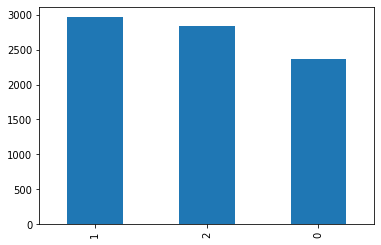

In [ ]:
pd.value_counts(train_df['domain']).plot.bar()
print(train_df.value_counts(train_df['domain']))

Bert Approach

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch
from transformers import TrainingArguments, Trainer
from transformers import BertTokenizer, BertForSequenceClassification,AutoTokenizer,AutoModelForSequenceClassification
from transformers import EarlyStoppingCallback

In [ ]:
class Dataset(torch.utils.data.Dataset):
      def __init__(self, encodings, labels=None):
          self.encodings = encodings
          self.labels = labels

      def __getitem__(self, idx):
          item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
          if self.labels:
              item["labels"] = torch.tensor(self.labels[idx])
          return item

      def __len__(self):
          return len(self.encodings["input_ids"])

In [ ]:
def compute_metrics(p):
      pred, labels = p
      pred = np.argmax(pred, axis=1)

      accuracy = accuracy_score(y_true=labels, y_pred=pred)
      recall = recall_score(y_true=labels, y_pred=pred, average='micro')
      precision = precision_score(y_true=labels, y_pred=pred, average='micro')
      f1 = f1_score(y_true=labels, y_pred=pred, average='micro')
      return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [ ]:
model_name = "ai4bharat/indic-bert"
indicbert_tokenizer = AutoTokenizer.from_pretrained(model_name, keep_accents=True)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)
 
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

X_train_tokenized = indicbert_tokenizer(X_train, padding=True, truncation=True, max_length=512)
X_val_tokenized = indicbert_tokenizer(X_test, padding=True, truncation=True, max_length=512)

train_dataset = Dataset(X_train_tokenized, y_train)
val_dataset = Dataset(X_val_tokenized, y_test)



args = TrainingArguments(
    output_dir="output/indic-bert",
    evaluation_strategy="steps",
    eval_steps=50,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    seed=0,
    load_best_model_at_end=True,
    logging_dir='logs',           
    logging_steps=50,
    do_train=True,
    do_eval=True,
)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
    
)

trainer.train()
indicbert_model_path = "output/indic-bert"
model.save_pretrained(indicbert_model_path)

Downloading:   0%|          | 0.00/507 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.38M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/129M [00:00<?, ?B/s]

Some weights of the model checkpoint at ai4bharat/indic-bert were not used when initializing AlbertForSequenceClassification: ['predictions.bias', 'predictions.decoder.bias', 'predictions.dense.weight', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias', 'predictions.dense.bias', 'sop_classifier.classifier.weight', 'predictions.decoder.weight', 'sop_classifier.classifier.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at ai4bharat/indi

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
50,1.055100,0.872622,0.530837,0.530837,0.530837,0.530837
100,0.802200,0.741846,0.637665,0.637665,0.637665,0.637665
150,0.770900,0.943665,0.416300,0.416300,0.416300,0.416300
200,0.798600,0.723747,0.629956,0.629956,0.629956,0.629956
250,0.736300,0.728549,0.578194,0.578194,0.578194,0.578194
300,0.791900,0.729475,0.614537,0.614537,0.614537,0.614537
350,0.757000,0.683206,0.583700,0.583700,0.583700,0.583700
400,0.716200,0.686393,0.680617,0.680617,0.680617,0.680617
450,0.746600,0.625714,0.721366,0.721366,0.721366,0.721366
500,0.619000,0.557037,0.786344,0.786344,0.786344,0.786344


***** Running Evaluation *****
  Num examples = 908
  Batch size = 8
***** Running Evaluation *****
  Num examples = 908
  Batch size = 8
***** Running Evaluation *****
  Num examples = 908
  Batch size = 8
***** Running Evaluation *****
  Num examples = 908
  Batch size = 8
***** Running Evaluation *****
  Num examples = 908
  Batch size = 8
***** Running Evaluation *****
  Num examples = 908
  Batch size = 8
***** Running Evaluation *****
  Num examples = 908
  Batch size = 8
***** Running Evaluation *****
  Num examples = 908
  Batch size = 8
***** Running Evaluation *****
  Num examples = 908
  Batch size = 8
***** Running Evaluation *****
  Num examples = 908
  Batch size = 8
Saving model checkpoint to output/indic-bert/checkpoint-500
Configuration saved in output/indic-bert/checkpoint-500/config.json
Model weights saved in output/indic-bert/checkpoint-500/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 908
  Batch size = 8
***** Running Evaluation *****
  Num ex

In [ ]:
X_test_tokenized = indicbert_tokenizer(X_test, padding=True, truncation=True, max_length=512)

# Create torch dataset
test_dataset = Dataset(X_test_tokenized)

# Load trained model

# model = BertForSequenceClassification.from_pretrained(model_path, num_labels=3)
indicbert_out_model = AutoModelForSequenceClassification.from_pretrained(indicbert_model_path, num_labels=3)
indicbert_out_model.to(device)


# Define test trainer
test_trainer = Trainer(indicbert_out_model)

# Make prediction
raw_pred, _, _ = test_trainer.predict(test_dataset)

# Preprocess raw predictions
y_pred = np.argmax(raw_pred, axis=1)

loading configuration file output/indic-bert/config.json
Model config AlbertConfig {
  "_name_or_path": "output/indic-bert",
  "architectures": [
    "AlbertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0,
  "bos_token_id": 2,
  "classifier_dropout_prob": 0.1,
  "down_scale_factor": 1,
  "embedding_size": 128,
  "eos_token_id": 3,
  "gap_size": 0,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "inner_group_num": 1,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "albert",
  "net_structure_type": 0,
  "num_attention_heads": 12,
  "num_hidden_groups": 1,
  "num_hidden_layers": 12,
  "num_memory_blocks": 0,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_clas

In [ ]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.8480176211453745